# 1. Initialisation

In [1]:
import numpy as np
import xarray as xr

In [2]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [3]:
temperature = xr.open_mfdataset('data/tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_CNRM-ALADIN63_v2_mon_202101-203012.nc')
temperature

<xarray.Dataset> Size: 115MB
Dimensions:            (y: 453, x: 453, nvertex: 4, time: 120, axis_nbounds: 2)
Coordinates:
  * y                  (y) float64 4kB 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
  * x                  (x) float64 4kB 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
  * time               (time) datetime64[ns] 960B 2021-01-16T12:00:00 ... 203...
    lat                (y, x) float64 2MB dask.array<chunksize=(453, 453), meta=np.ndarray>
    lon                (y, x) float64 2MB dask.array<chunksize=(453, 453), meta=np.ndarray>
    height             float64 8B ...
Dimensions without coordinates: nvertex, axis_nbounds
Data variables:
    bounds_lon         (y, x, nvertex) float64 7MB dask.array<chunksize=(453, 453, 4), meta=np.ndarray>
    bounds_lat         (y, x, nvertex) float64 7MB dask.array<chunksize=(453, 453, 4), meta=np.ndarray>
    time_bounds        (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    tas                (time, y, x) float32 99MB dask.array<chunksize=(1, 453, 453), meta=np.ndarray>
    Lambert_Conformal  |S1 1B ...
Attributes: (12/26)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2019-05-25T06:14:38Z
    institute_id:                   CNRM
    institution:                    CNRM (Centre National de Recherches Meteo...
    ...                             ...
    experiment:                     RCP4.5 run with GCM forcing
    driving_experiment_name:        rcp45
    driving_experiment:             CNRM-CERFACS-CNRM-CM5, rcp45, r1i1p1
    comment:                        CORDEX Europe EUR-11 CNRM-ALADIN 6.3 L91 ...
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1...
    tracking_id:                    hdl:21.14103/f8171191-c1f2-4e57-bc8b-c6c4...

# 2. Plot

In [4]:
def plot_month(month):
    fig = plt.figure(figsize=(10,5))
    p = ccrs.PlateCarree()
    ax = plt.subplot(1,1,1, projection=p)
    ax.set_title(month)
    im = plt.pcolormesh(temperature['tas'].lon, temperature['tas'].lat, temperature['tas'].loc[month][0]-273,
                        cmap='coolwarm', transform=p, vmin=-10, vmax=40)
    ax.coastlines(color='black')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent([-15, 35, 20, 75], crs=p)
    cbar = plt.colorbar(im,fraction=0.05, pad=0.1)
    cbar.set_label('Temperature [$^\circ$C]')

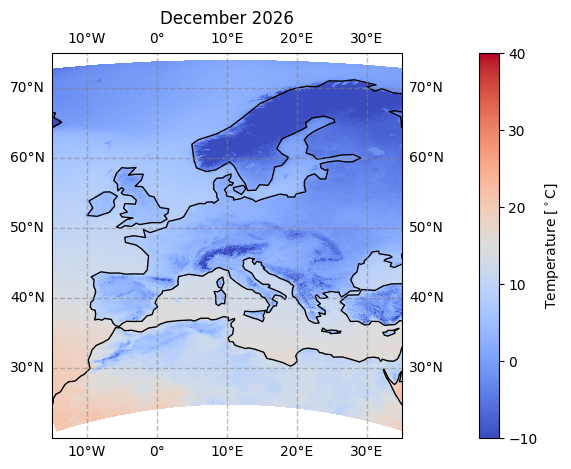

In [5]:
plot_month("December 2026")

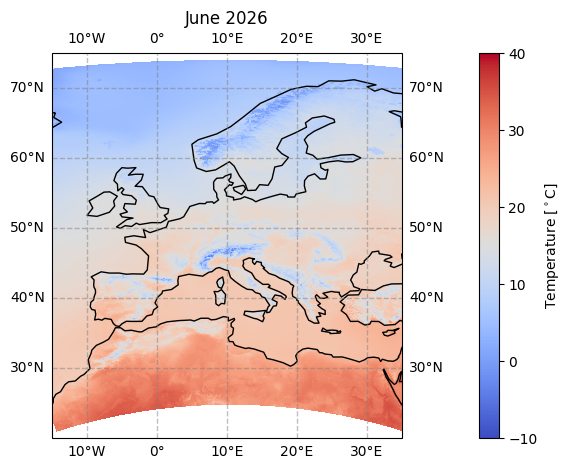

In [6]:
plot_month("June 2026")